# Descriptive analyis: Six months

In [23]:
%matplotlib inline

In [24]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models, similarities
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="darkgrid", color_codes=True)
import re
from collections import Counter

In [25]:
# read data
df = pd.read_csv('data/six_months.csv')
df.columns = list(df.columns.str.lower())

# Text: The best of being outside

In [26]:
text = df['p1'].str.cat(sep=' ').lower()

In [27]:
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'nan', '', text)

In [28]:
stop = stopwords.words('spanish')

In [29]:
stop.extend(['sido', 'pude', 'mas', 'poder','estan', 'encontrar', 'ni'])

In [30]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

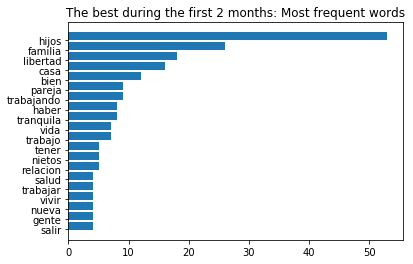

In [31]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('The best during the first 2 months: Most frequent words');

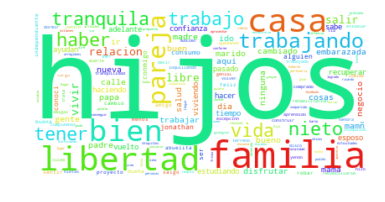

In [32]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.savefig('plots/asp_positivos_wordcloud_seis_meses.pdf',  bbox_inches='tight', dpi=600)

# Text: The most difficult of being outside



In [33]:
text = df['p2'].str.cat(sep=' ').lower()
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'droga\b', 'drogas', text)
text = re.sub(r'nan', '', text)

In [34]:
stop = stopwords.words('spanish')
stop.extend(['sido', 'pude', 'mas', 'poder', 'estan', 'dificil'])

In [35]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

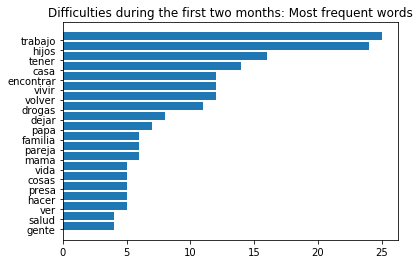

In [36]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('Difficulties during the first two months: Most frequent words');

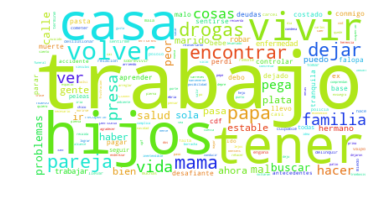

In [37]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.savefig('plots/dificultades_wordcloud_seis_meses.pdf', bbox_inches='tight', dpi=600)

# Mental Health

TODO: combine all waves so far and plot them together.

In [38]:
mh = df.loc[:, 'salud_mental_1':'salud_mental_90'] # only 89 items
mh.replace(-9, np.nan, inplace=True)
mh['score_mh'] = mh.mean(axis=1)

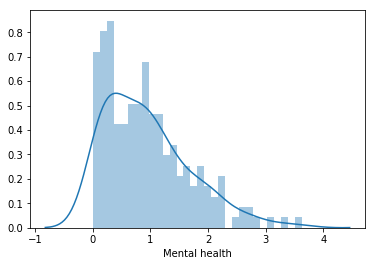

In [39]:
sns.distplot(mh['score_mh'].dropna(), hist=True, bins=30)
plt.xlabel('Mental health');